In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import sys

In [65]:
"""载入新的模型并画图，给出failure示例"""
import os
import torch
import sys
sys.path.append('/root/workspace/pathology_eval/eval_mitos14')
import basic
checkpoint_paths = {
        'resnet18':'/root/workspace/pathology_eval/eval_save/mitos/resnet18/2019-07-12 14-12-05/',
        'resnet34':'/root/workspace/pathology_eval/eval_save/mitos/resnet34/2019-07-14 21-23-27',
        'resnet50':'/root/workspace/pathology_eval/eval_save/mitos/resnet50/2019-07-13 08-08-02/',
        'resnet101':'/root/workspace/pathology_eval/eval_save/mitos/resnet101_lr0.1/2019-07-14 16-04-32/',
        'resnet152':'/root/workspace/pathology_eval/eval_save/mitos/resnet152/2019-07-14 21-24-41/',
    'shufflenet_v2_x0_5':'/root/workspace/pathology_eval/eval_save/mitos/shufflenet_v2_x0_5/2019-07-14 21-36-00/',
    'shufflenet_v2_x1_0':'/root/workspace/pathology_eval/eval_save/mitos/shufflenet_v2_x1_0/2019-07-14 21-38-37/',
    'shufflenet_v2_x1_5':'/root/workspace/pathology_eval/eval_save/mitos/shufflenet_v2_x1_5/2019-07-14 21-39-12/',
    'shufflenet_v2_x2_0':'/root/workspace/pathology_eval/eval_save/mitos/shufflenet_v2_x2_0/2019-07-14 21-39-26/',
    'alexnet':'/root/workspace/pathology_eval/eval_save/mitos/alexnet/2019-07-14 21-47-50/',
        }
tag = 'shufflenet_v2_x0_5'
root_save = checkpoint_paths[tag]

def new_draw(root_save):
    epoch_name = 'checkpoint.pth'
    # best_name = 'best_acc.pth'
    epoch_path = os.path.join(root_save, epoch_name)
    print(epoch_path)
    epoch_checkpoint = torch.load(epoch_path)
    # best_path = os.path.join(root_save, best_name)
    # best_checkpoint = torch.load(best_path)
    # return epoch_checkpoint, best_checkpoint
    return epoch_checkpoint

In [66]:
"""获取最佳的acc"""
# epoch_checkpoint, best_checkpoint = new_draw(root_save)
epoch_checkpoint = new_draw(root_save)
# print(epoch_checkpoint['best_epoch'], epoch_checkpoint['best_acc'])
"""获取全部流程的acc"""
print(epoch_checkpoint['epoch'], epoch_checkpoint['best_epoch'], epoch_checkpoint['best_acc'])
"""临时代码 checkpoint 字典"""
epoch_checkpoint.keys()
"""临时代码 获取各epoch acc 列表"""
test_acc_avg = [float(test_acc['avg_counter'].avg) for test_acc in epoch_checkpoint['test_acc_list']]
train_acc_avg = [float(train_acc['avg_counter'].avg) for train_acc in epoch_checkpoint['train_acc_list']]
# print(test_acc_avg, '\n', train_acc_avg)

/root/workspace/pathology_eval/eval_save/mitos/shufflenet_v2_x0_5/2019-07-14 21-36-00/checkpoint.pth
115 41 tensor([82.2044])


82.20443349753694


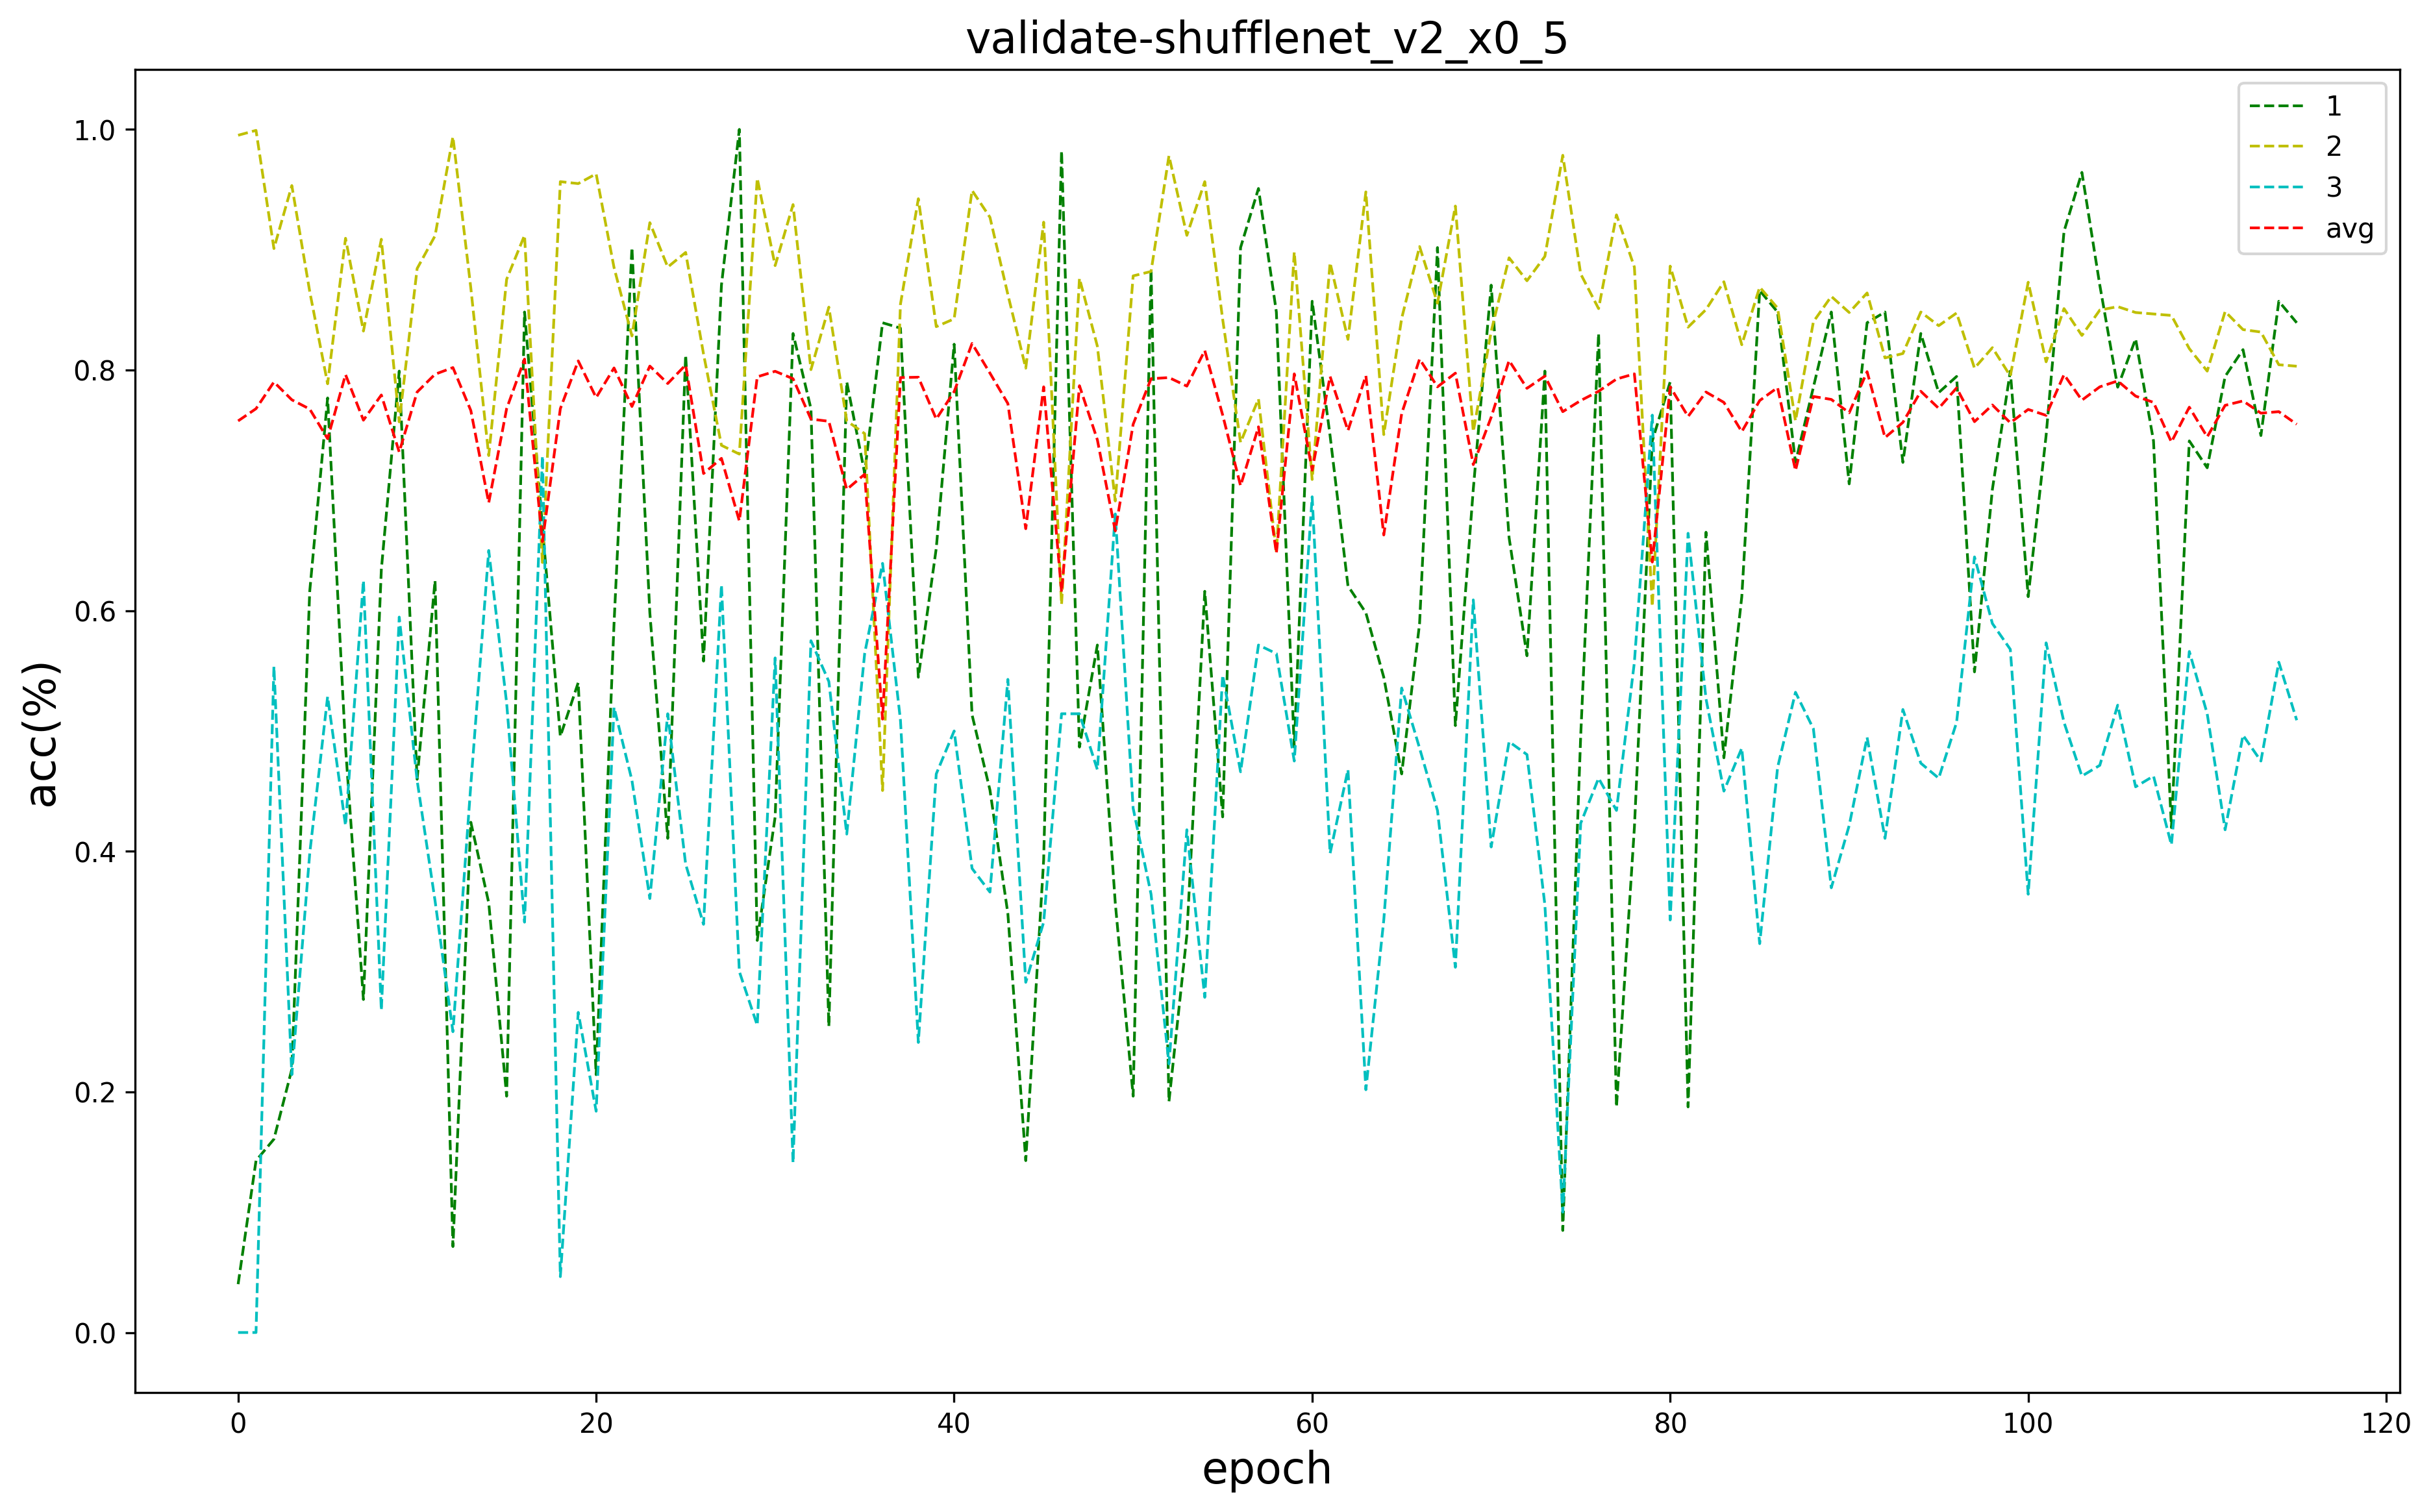

In [67]:
"""临时代码 获取各epoch 单个类别acc列表"""
epoch_acc_avg = {0:[], 1:[], 2:[], 3:[]}
for epoch_acc in epoch_checkpoint['test_acc_list']:
    labels = {0:0, 1:0, 2:0}
    corrects = {0:0, 1:0, 2:0}
    for sample in epoch_acc['epoch_acc_image']:
        labels[sample['label']] += 1
        corrects[sample['label']] += 1 if sample['is_correct'] else 0
    total_label = 0
    total_correct = 0
    for i in [0,1,2]:
        epoch_acc_avg[i].append(corrects[i] / labels[i])
        total_label += labels[i]
        total_correct += corrects[i]
    epoch_acc_avg[3].append(total_correct / total_label)
# print([len(acc_avg) for acc_avg in epoch_acc_avg.values()], epoch_acc_avg)
print(max(epoch_acc_avg[3])*100)
"""临时代码 画图展示结果"""
title = 'validate-' +tag
color = ['','','','','','','','']
line = ['-','--','-.']
marker = ['o','.','*']

## 画图
plt.figure(figsize=(15,9))
plt.rcParams['savefig.dpi'] = 256 #图片像素
plt.rcParams['figure.dpi'] = 256
plt.title(title,fontsize = 16)
#设置坐标轴标签
plt.xlabel("epoch",fontsize = 16)
plt.ylabel("acc(%)",fontsize = 16)
## draw
i = 0
epoch_iter = range(len(epoch_acc_avg[0]))

plt.plot(epoch_iter, epoch_acc_avg[0], 'g--', linewidth=1, label=('%d'%i))
plt.plot(epoch_iter, epoch_acc_avg[1], 'y--', linewidth=1, label=('%d'%i))
plt.plot(epoch_iter, epoch_acc_avg[2], 'c--', linewidth=1, label=('%d'%i))
plt.plot(epoch_iter, epoch_acc_avg[3], 'r--', linewidth=1, label=('%d'%i))


# 添加说明
plt.legend(('1', '2', '3', 'avg'), loc='upper right')
## 图像要在执行完之前保存


# plt.savefig('/root/workspace/pathology_eval/BloodCellsImage/save/error_plot.png', bbox_inches='tight')

92.37148834429169


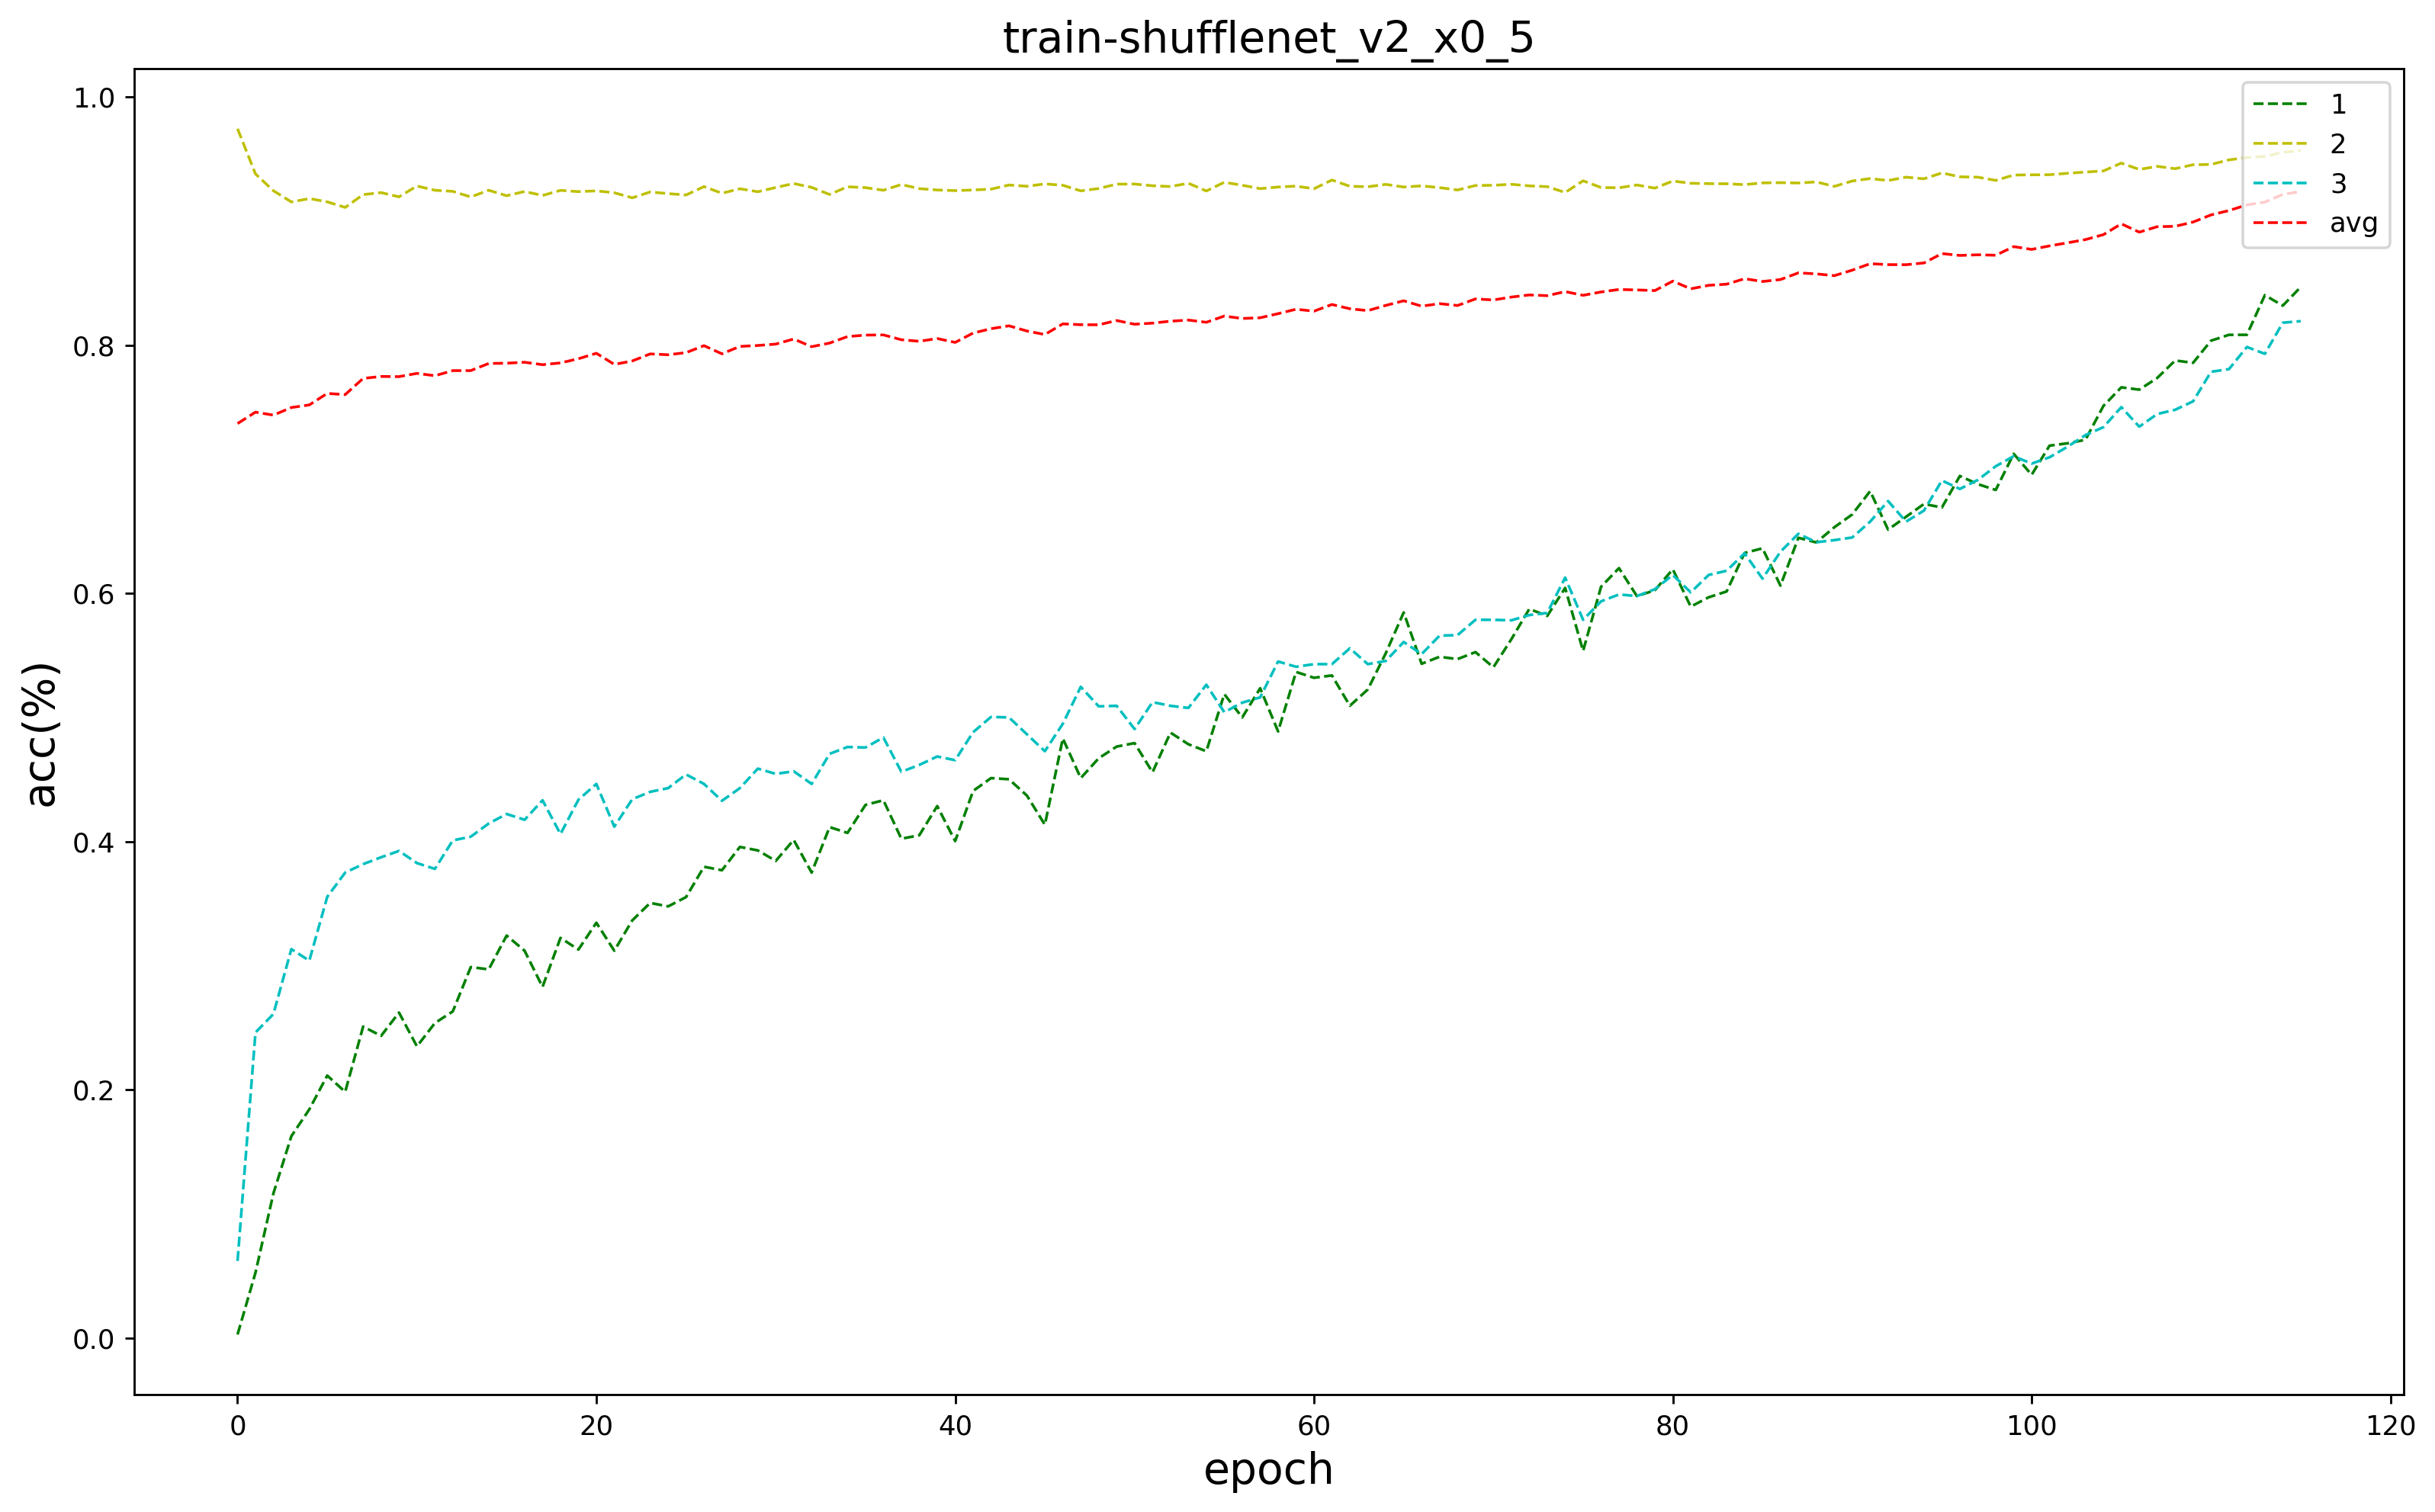

In [68]:
"""临时代码 获取各epoch 单个类别acc列表"""
epoch_acc_avg = {0:[], 1:[], 2:[], 3:[]}
for epoch_acc in epoch_checkpoint['train_acc_list']:
    labels = {0:0, 1:0, 2:0}
    corrects = {0:0, 1:0, 2:0}
    for sample in epoch_acc['epoch_acc_image']:
        labels[sample['label']] += 1
        corrects[sample['label']] += 1 if sample['is_correct'] else 0
    total_label = 0
    total_correct = 0
    for i in [0,1,2]:
        epoch_acc_avg[i].append(corrects[i] / labels[i])
        total_label += labels[i]
        total_correct += corrects[i]
    epoch_acc_avg[3].append(total_correct / total_label)
# print([len(acc_avg) for acc_avg in epoch_acc_avg.values()], epoch_acc_avg)
print(max(epoch_acc_avg[3])*100)
"""临时代码 画图展示结果"""
title = 'train-' +tag
color = ['','','','','','','','']
line = ['-','--','-.']
marker = ['o','.','*']

## 画图
plt.figure(figsize=(15,9))
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300
plt.title(title,fontsize = 16)
#设置坐标轴标签
plt.xlabel("epoch",fontsize = 16)
plt.ylabel("acc(%)",fontsize = 16)
## draw
i = 0
epoch_iter = range(len(epoch_acc_avg[0]))

plt.plot(epoch_iter, epoch_acc_avg[0], 'g--', linewidth=1, label=('%d'%i))
plt.plot(epoch_iter, epoch_acc_avg[1], 'y--', linewidth=1, label=('%d'%i))
plt.plot(epoch_iter, epoch_acc_avg[2], 'c--', linewidth=1, label=('%d'%i))
plt.plot(epoch_iter, epoch_acc_avg[3], 'r--', linewidth=1, label=('%d'%i))


# 添加说明
plt.legend(('1', '2', '3', 'avg'), loc='upper right')
## 图像要在执行完之前保存


# plt.savefig('/root/workspace/pathology_eval/BloodCellsImage/save/error_plot.png', bbox_inches='tight')